# California housing regression problem

In [89]:
import warnings
warnings.filterwarnings('ignore')

from model_tools.regression import *
from model_tools.utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [90]:
data = fetch_california_housing(as_frame=True)['data']
target = fetch_california_housing(as_frame=True)['target']
data = data.join(target)

In [91]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
data = data[data.MedHouseVal<=5.1]

In [93]:
data = Data(data, ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'MedHouseVal', 0.8)

In [94]:
from sklearn.linear_model import LinearRegression
reg = Regressor(LinearRegression(), "lr")

Model training score: 0.6088968118672871
Model prediction score: 0.5943232652466202
Model RMSE: 0.7273129773603114
Model MAE: 0.5351261336554506


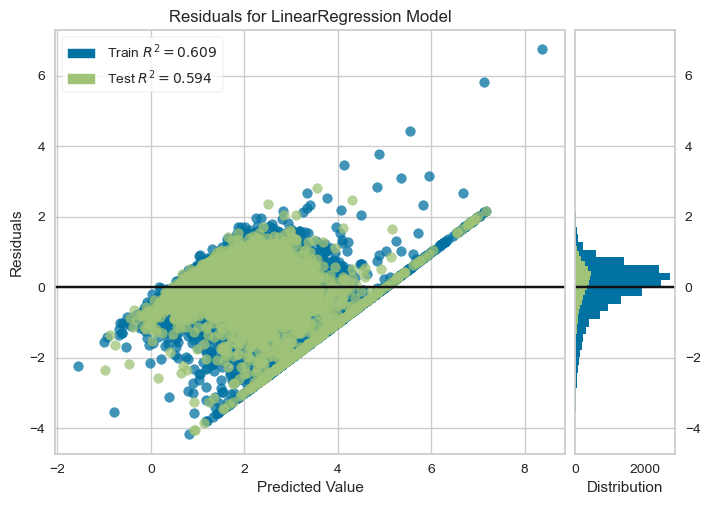

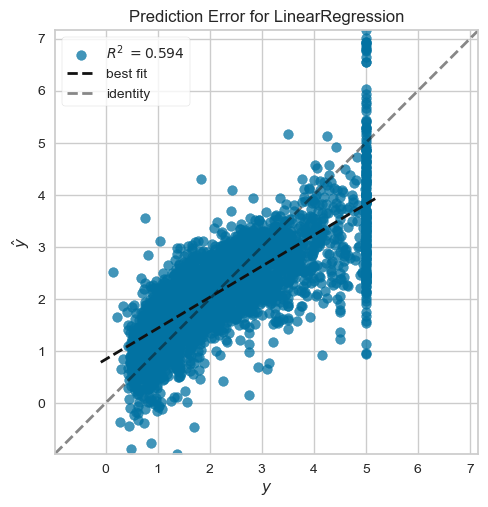

In [95]:
setting = Setting(transforming_strategy="")
p1 = CustomPipeline(reg, data, setting)
p1.get_summary()

Model training score: 0.6667104691951413
Model prediction score: 0.6545642241572889
Model RMSE: 0.6711428114380809
Model MAE: 0.472146579815704


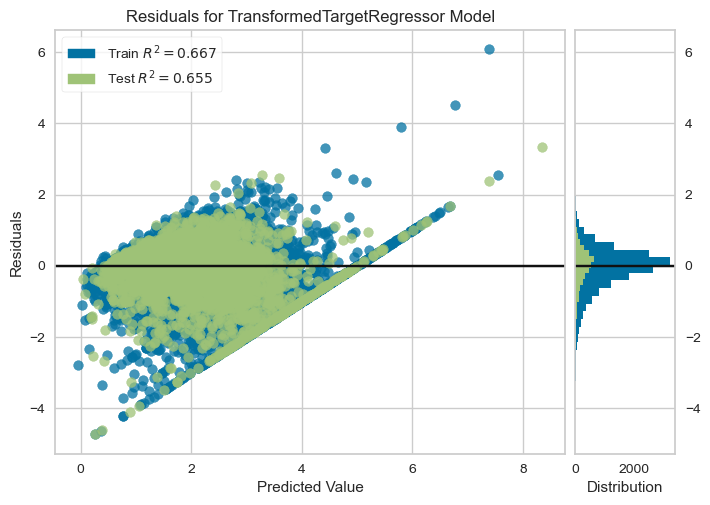

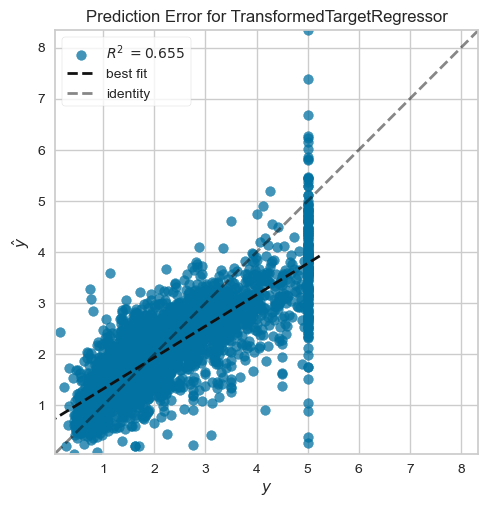

In [96]:
setting = Setting(transforming_strategy="yeo-johnson")
p1 = CustomPipeline(reg, data, setting)
p1.get_summary()

Model training score: 0.7344070809926275
Model prediction score: 0.703307161416981
Model RMSE: 0.6219920267591975
Model MAE: 0.4347058811914724


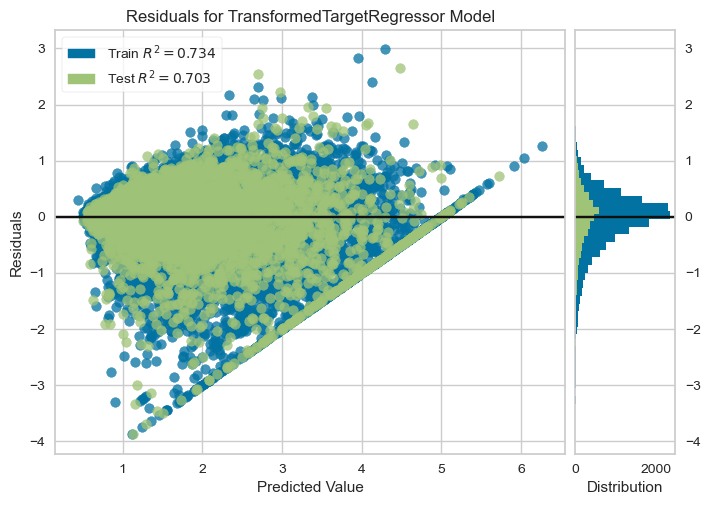

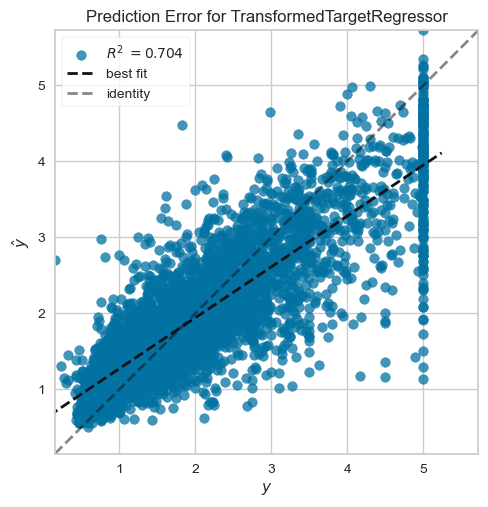

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
setting = Setting(transforming_strategy="yeo-johnson")
reg = Regressor(GradientBoostingRegressor(), "gradientboosting")
p1 = CustomPipeline(reg, data, setting)
p1.get_summary()

In [98]:
100000*0.6219920267591975

62199.202675919754